# 💡 Projenin Amacı ve Genel Bilgi

Bu projenin temel amacı, sosyal medya platformlarında paylaşılan içerikler üzerinden depresyon belirtileri taşıyan gönderileri tespit etmek ve bu tür içerikleri analiz ederek dil örüntülerini anlamaktır. Twitter tabanlı veri seti üzerinde doğal dil işleme (NLP) teknikleri ve veri görselleştirme yöntemleri kullanılarak bir ön analiz gerçekleştirilmiştir.

## 🎯 Projenin Hedefleri:

- 📌 Sosyal medya kullanıcılarının paylaşımları üzerinden depresif içeriklerin veri analiziyle belirlenip sınıflandırılması
- 📌 Potansiyel depresyon içerikli tweet’lerin kelime yapılarını, uzunluklarını ve sıklıkla kullanılan ifadelerini incelemek
- 📌 Olumlu ve depresif içeriklerin dilsel farklılıklarını görselleştirerek farkındalık sağlamak
- 📌 Makine öğrenmesi modellerine veri hazırlığı amacıyla metinlerin temizlenmesi ve dönüştürülmesi

## 🗂️ Kullanılan Veri:

- Kaynak: Kaggle (Twitter tabanlı depresyon sınıflandırma veri seti)
- Veri Seti Özellikleri:
  - `Tweet`: Twitter kullanıcılarının gönderdiği mesaj
  - `Suicide`: Tweet'in sınıfı (Depresyon içerikli mi, değil mi)
  - Toplam tweet sayısı: ~2300 (Not: Sınıf dağılımı dengesizdir)

## ⚙️ Kullanılan Yöntemler:

- 📥 Pandas ile veri okuma ve işleme
- 🧼 NLP teknikleri: metin temizleme, stopword çıkarımı, tokenization
- 📊 Görselleştirme araçları: Matplotlib, Seaborn, WordCloud
- 📈 Sınıfların dağılımını, metin uzunluklarını ve içerik farklılıklarını analiz etme

## 🌟 Sonuç Olarak:

Bu proje, sosyal medya üzerinden depresyon riskini anlamaya yönelik ilk adım niteliğindedir. Veri görselleştirme ve içerik analizi sayesinde depresif içerik taşıyan tweet’lerin genel dil yapısı gözlemlenmiş, ileride yapılacak makine öğrenmesi modelleri için ön hazırlık yapılmıştır.


## 📥 1.Veri Seti Yükleme ve Temel Temizlik  
Twitter tabanlı sosyal medya verisi, `pandas` kütüphanesi ile yüklenmiştir.  
Verideki `Suicide` sütunundaki sınıf isimlerinin başında/sonunda boşluklar olduğundan, `.str.strip()` fonksiyonu ile bu hatalar düzeltilmiştir.  
Bu adım, sınıfların doğru gruplanabilmesi için önemlidir.


In [1]:
import pandas as pd

df = pd.read_csv("Suicide_Ideation_Dataset(Twitter-based).csv")  
df["Suicide"] = df["Suicide"].str.strip()


## 🧹 Stopwords Tanımı  
Tweet’lerdeki anlam taşımayan kelimeleri filtrelemek için iki farklı liste tanımlanmıştır:  
- `stop_words`: İngilizce dilinde genel geçer, anlam taşımayan kelimeler (örn. "the", "is", "and")  
- `manual_stopwords`: Sosyal medya diline özgü, ASCII bozulmuş veya anlamsız karakterler içeren kelimeler (örn. "rt", "amp", "â€", "â€™", "co")  
Bu adım, veri temizliğinin kalitesini artırır ve anlamlı analiz yapılmasını sağlar.


In [82]:
stop_words = set(stopwords.words("english"))
manual_stopwords = {
    "rt", "amp", "https", "im", "i'm", "â€™", "â€", "-", "&amp;", "…", "'", "t", "co"
}


## 🔴 Depresyon İçerikli Tweet’lerin Temizlenmesi  
"Potential Suicide post" sınıfına ait tweet’ler seçilmiş, ASCII karakter dışı öğeler kaldırılmış ve tüm harfler küçültülmüştür.  
Daha sonra bu metinler:
- Boşluklara göre ayrılmıştır
- `stop_words` ve `manual_stopwords` ile filtrelenmiştir
- `http` ile başlayan link kalıntıları da çıkarılmıştır  
Bu işlem sonrasında, **duygusal ve depresyon belirten ifadeler** ortaya çıkartılmıştır.


In [83]:
suicide_tweets = df[df["Suicide"] == "Potential Suicide post"]["Tweet"]
suicide_clean = suicide_tweets.astype(str).str.encode("ascii", "ignore").str.decode("ascii")
suicide_text = " ".join(suicide_clean).lower()
suicide_words = suicide_text.split()

filtered_suicide_words = [
    word for word in suicide_words
    if word not in stop_words
    and word not in manual_stopwords
    and not word.startswith("http")
]


## 📊 En Sık Geçen Kelimeler (Depresyon İçerikli)  
`Counter` fonksiyonu ile en sık geçen 20 kelime belirlenmiş ve tablo haline getirilmiştir.  
Bu tablo ileride hem WordCloud hem de Barplot görsellerinde kullanılacaktır.  
Kelimeler, depresyonla ilgili içerikleri (örn. "die", "alone", "tired") yansıtmaktadır.


In [84]:
suicide_counter = Counter(filtered_suicide_words)
suicide_df = pd.DataFrame(suicide_counter.most_common(20), columns=["Kelime", "Frekans"])


## 🟢 Normal Tweet’lerin Temizlenmesi  
"Not Suicide post" sınıfına ait tweet’ler de aynı şekilde:
- ASCII karakter dışı içerikten temizlenmiş
- Harfler küçültülmüş
- Stopwords ve manuel anlamsız kelimeler çıkarılmıştır  
Bu adım, pozitif ve sosyal içeriklerin analizini sağlamak için hazırlanmıştır.


In [122]:
not_suicide_clean = df[df["Suicide"] == "Not Suicide post"]["Tweet"].astype(str).str.encode("ascii", "ignore").str.decode("ascii")
not_suicide_text = " ".join(not_suicide_clean).lower()
not_words = not_suicide_text.split()

filtered_not_words = [
    word for word in not_words
    if word not in stop_words
    and word not in manual_stopwords
    and not word.startswith("http")
]


In [123]:
not_suicide_counter = Counter(filtered_not_words)
not_suicide_df = pd.DataFrame(not_suicide_counter.most_common(20), columns=["Kelime", "Frekans"])


In [124]:
df["length"] = df["Tweet"].astype(str).apply(len)


## 📊  Tweet Sınıflarının Sayımı  
Veride "Potential Suicide post" ve "Not Suicide post" sınıflarının kaç adet olduğu sayılmıştır.  
Sınıf dengesizliği olup olmadığı bu adımda kontrol edilir.


In [125]:
df["Suicide"].value_counts()

Suicide
Not Suicide post          1127
Potential Suicide post     660
Name: count, dtype: int64

## 📝İlk 10 Depresyon İçerikli Tweet  
"Potential Suicide post" sınıfındaki ilk 10 tweet filtrelenip gösterilmiştir.  
İçerik örnekleri, verinin metin yapısı hakkında fikir verir.


In [126]:
suicide_tweets = df[df["Suicide"] == "Potential Suicide post"]["Tweet"].dropna()
suicide_tweets.apply(lambda x: f"[{x}]" if isinstance(x, str) else x).head(10)

2     [@dizzyhrvy that crap took me forever to put t...
7     [@jakepaul @jamescharles @LoganPaul Just becau...
9     [I hate my life lmao I hope I die soon or sumn...
13    [I have an awful habit of avoiding writing pap...
16    [@AkwesiQuan,,RT @animeesay: I want to say ill...
18    [SOMEBODY PLEASE FUCKING KILL ME IM SO IN LOVE...
19    [Iâm at the point of the semester where Iâ...
20    [@sadegsi,ger/rus/eng,I want to die so much, I...
21    [And I hate the fact if it's true Dojae will d...
22    [RT @Soulwhisperer3: When you're tired of livi...
Name: Tweet, dtype: object

## 🔤Filtrelenmiş Kelime Listesi  
Tweet metinlerinden `stopwords` ve manuel olarak belirlenen sosyal medya kaynaklı bozuk kelimeler (`manual_stopwords`) çıkarılmıştır.  
Bu adım, anlamlı içeriklerin analizini kolaylaştırır.


In [127]:
manual_stopwords = {"rt", "amp", "https", "im", "â€™", "â€", "iâ€™m"}

filtered_words = [
    word for word in suicide_text.split()
    if word not in stop_words and word.lower() not in manual_stopwords
]

## 📊Tweet Sınıflarının Görsel Dağılımı  
Seaborn ile oluşturulan bu barplot, veri setinde kaç adet "Not Suicide" ve "Potential Suicide" tweet’i olduğunu gösterir.  
Veri setinin dengesini anlamak için kullanılır.


/var/folders/gs/ykl8gdkx00908nfcxlmr_4c80000gn/T/ipykernel_84253/1065479565.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Suicide", palette="coolwarm")


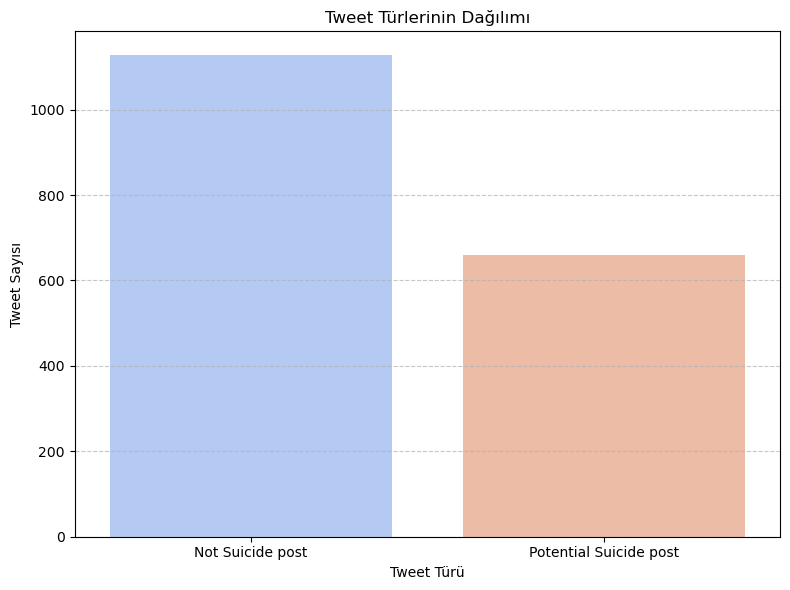

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Suicide", palette="coolwarm")
plt.title("Tweet Türlerinin Dağılımı")
plt.xlabel("Tweet Türü")
plt.ylabel("Tweet Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 📏 Tweet Uzunluğu Dağılımı – Histogram ve KDE  
Her tweet’in karakter cinsinden uzunluğu hesaplanmış, ardından histogram ve KDE eğrisi ile görselleştirilmiştir.  
Veri setindeki iki sınıfın ortalama uzunluk farkları gözlenebilir.


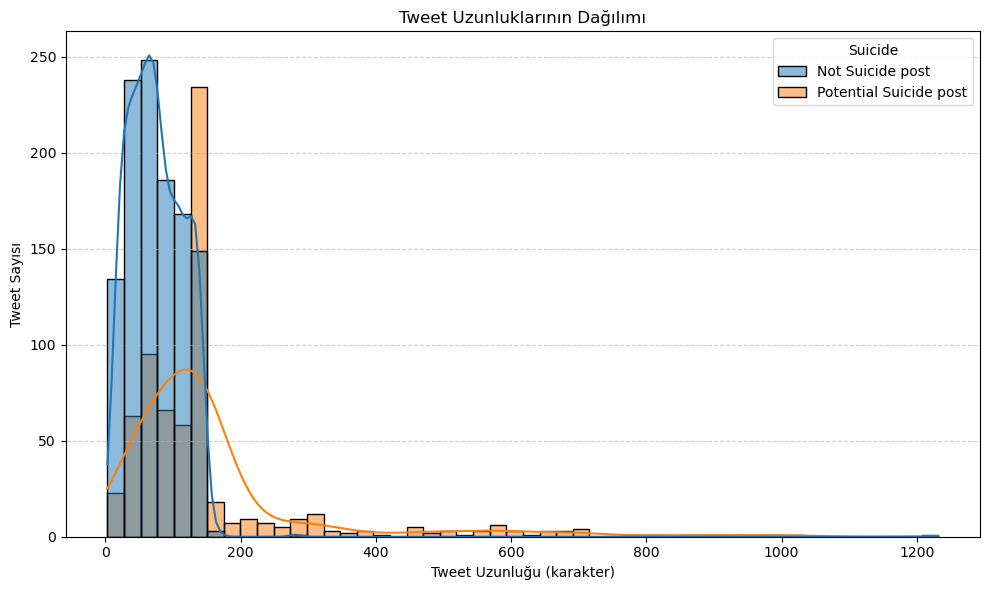

In [129]:

df["length"] = df["Tweet"].apply(lambda x: len(str(x)))


plt.figure(figsize=(10,6))
sns.histplot(data=df, x="length", hue="Suicide", bins=50, kde=True)
plt.title("Tweet Uzunluklarının Dağılımı")
plt.xlabel("Tweet Uzunluğu (karakter)")
plt.ylabel("Tweet Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 🔴Depresyon İçerikli Tweet'lerde En Sık Kelimeler – Tablo  
"Potential Suicide post" sınıfında en çok geçen 20 kelime tablo şeklinde listelenmiştir.  
Bu tablo analiz için temel frekans verisini oluşturur.


In [130]:
# Potential Suicide Tweet – En Sık 20 Kelime Tablosu
suicide_df

,Kelime,Frekans
0,want,218
1,dont,158
2,like,123
3,hate,120
4,life,109
5,tired,107
6,fucking,93
7,die,88
8,feel,83
9,kill,73


## 🔴 En Sık Kelimeler – Barplot  
Yukarıdaki tablo barplot ile görselleştirilmiştir.  
`die`, `kill`, `hate`, `tired` gibi kelimelerin baskın olduğu görülür.


/var/folders/gs/ykl8gdkx00908nfcxlmr_4c80000gn/T/ipykernel_84253/3098423514.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=suicide_df, x="Frekans", y="Kelime", palette="Reds_r")
/var/folders/gs/ykl8gdkx00908nfcxlmr_4c80000gn/T/ipykernel_84253/3098423514.py:10: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


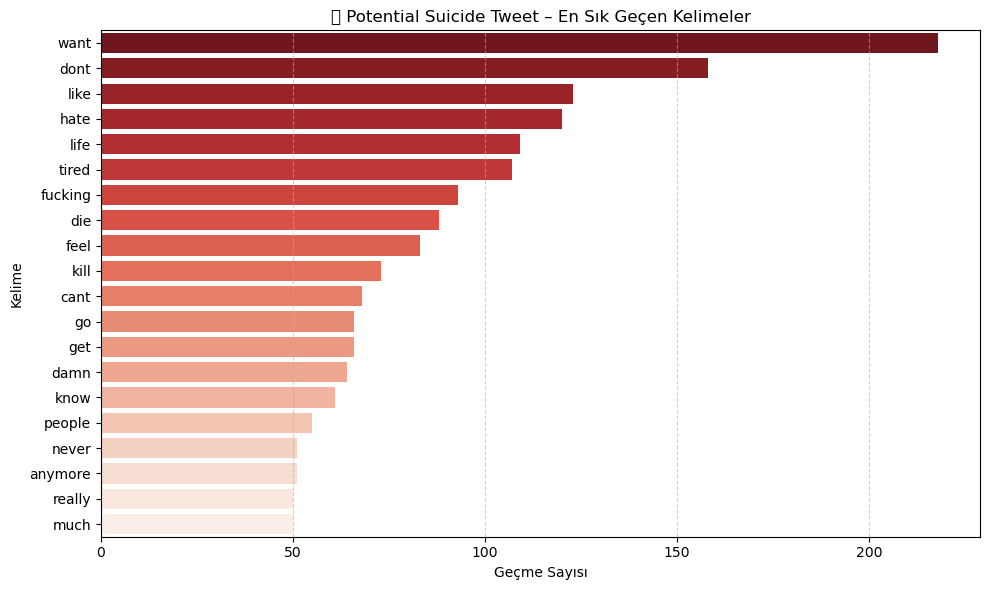

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=suicide_df, x="Frekans", y="Kelime", palette="Reds_r")
plt.title("🔴 Potential Suicide Tweet – En Sık Geçen Kelimeler")
plt.xlabel("Geçme Sayısı")
plt.ylabel("Kelime")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## ☁️Depresyon İçerikli Tweet’ler – WordCloud  
Depresyon sınıfına ait tweet'lerden elde edilen temiz kelimeler ile bir WordCloud oluşturulmuştur. Bu bulutta, kelimelerin frekansını temsilen boyutları artmakta/küçülmektedir. Yoğun negatif duygu yüklenmesi olan kelimeler ön plandadır.
Kelimelerin büyüklüğü, frekanslarıyla orantılıdır.


/var/folders/gs/ykl8gdkx00908nfcxlmr_4c80000gn/T/ipykernel_84253/3218017618.py:33: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


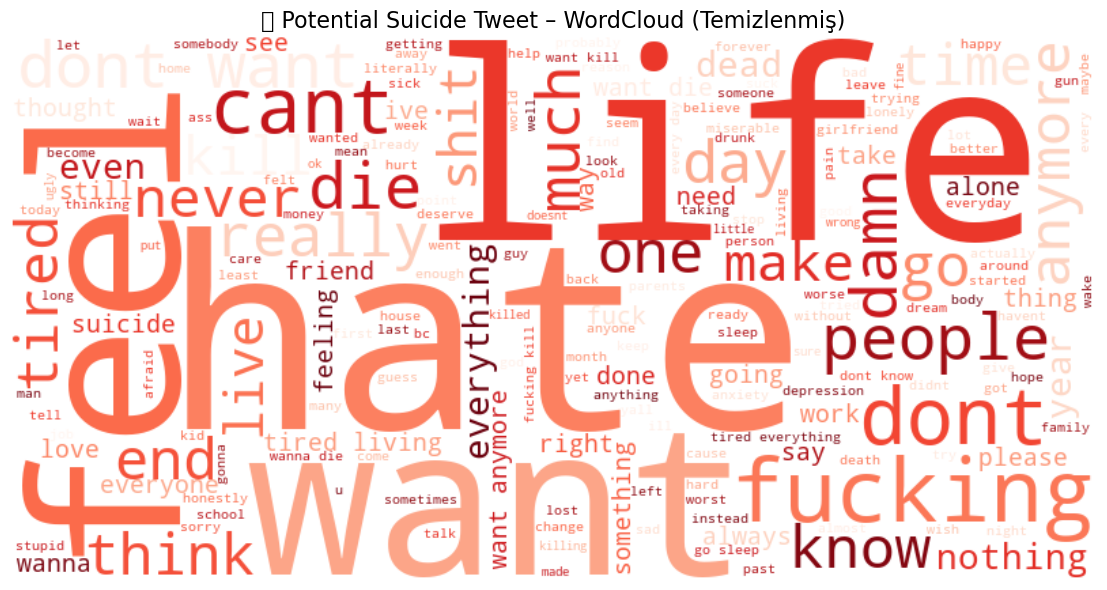

In [132]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Güncel manual stopwords listesi
manual_stopwords = {
    "rt", "amp", "https", "im", "i'm", "â€™", "â€", "-", "&amp;", "…", "‘", "’", "t", "co"
}

# ASCII olmayan karakterleri temizle
suicide_tweets_clean = suicide_tweets.astype(str).str.encode('ascii', 'ignore').str.decode('ascii')

# Metinleri birleştir ve küçük harfe çevir
suicide_text = " ".join(suicide_tweets_clean).lower()

# Kelimeleri ayır ve filtrele
words = suicide_text.split()
filtered_words = [
    word for word in words
    if word not in stop_words
    and word not in manual_stopwords
    and not word.startswith("http")
]

# WordCloud oluştur
wordcloud_text = " ".join(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(wordcloud_text)

# Görselleştir
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🔴 Potential Suicide Tweet – WordCloud (Temizlenmiş)", fontsize=16)
plt.tight_layout()
plt.show()

## 🟢 Olumlu Tweet’ler – Kelime Temizleme ve Tablo  
"Not Suicide post" sınıfındaki tweet’ler filtrelenerek en sık geçen 20 kelime tablo haline getirilmiştir.


In [133]:
not_suicide_clean = df[df["Suicide"] == "Not Suicide post"]["Tweet"].astype(str).str.encode('ascii', 'ignore').str.decode('ascii')
not_suicide_text = " ".join(not_suicide_clean).lower()
not_suicide_words = not_suicide_text.split()


In [134]:
from collections import Counter


not_suicide_clean = df[df["Suicide"] == "Not Suicide post"]["Tweet"].astype(str).str.encode('ascii', 'ignore').str.decode('ascii')
not_suicide_text = " ".join(not_suicide_clean).lower()
not_suicide_words = not_suicide_text.split()


stop_words = set(stopwords.words("english"))
manual_stopwords = {
    "rt", "amp", "https", "im", "i'm", "â€™", "â€", "-", "&amp;", "…", "'", "t", "co"
}


filtered_not_suicide_words = [
    word for word in not_suicide_words
    if word not in stop_words and word not in manual_stopwords
]

not_suicide_counter = Counter(filtered_not_suicide_words)
not_suicide_df = pd.DataFrame(not_suicide_counter.most_common(20), columns=["Kelime", "Frekans"])

# 5. Göster
not_suicide_df


,Kelime,Frekans
0,good,80
1,want,67
2,like,60
3,love,57
4,get,44
5,day,44
6,going,37
7,great,36
8,one,35
9,got,34


## 🟢 Olumlu Tweet’lerde En Sık Kelimeler – Barplot  
Sık kelimeler barplot ile görselleştirilmiştir.  
`love`, `happy`, `friend` gibi olumlu içerikli kelimeler öne çıkar.


/var/folders/gs/ykl8gdkx00908nfcxlmr_4c80000gn/T/ipykernel_84253/2245568205.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=not_suicide_df, x="Frekans", y="Kelime", palette="Greens_r")
/var/folders/gs/ykl8gdkx00908nfcxlmr_4c80000gn/T/ipykernel_84253/2245568205.py:10: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


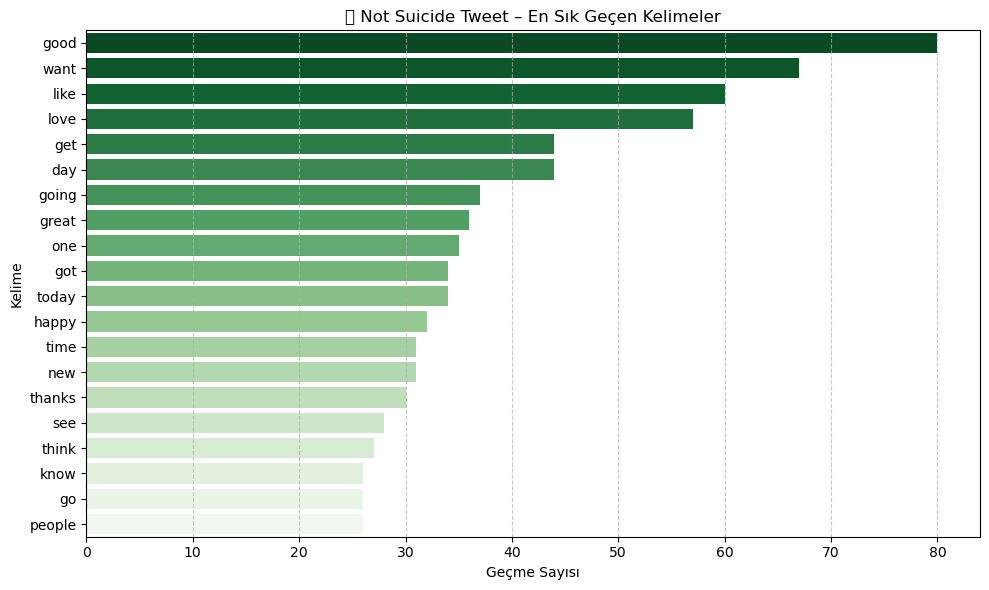

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=not_suicide_df, x="Frekans", y="Kelime", palette="Greens_r")
plt.title("🟢 Not Suicide Tweet – En Sık Geçen Kelimeler")
plt.xlabel("Geçme Sayısı")
plt.ylabel("Kelime")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 🛠️ WordCloud Kütüphanesi Kurulumu  
WordCloud kütüphanesi bu pip komutu ile kurulabilir.  



In [136]:
!pip install wordcloud

## ☁️ Olumlu Tweet’ler – WordCloud  

Bu adımda, depresyon belirtisi taşımayan yani \"Not Suicide post\" sınıfına ait tweet’ler üzerinde oluşturulan WordCloud (kelime bulutu) görselleştirilmiştir.  

WordCloud, metinlerde en sık geçen kelimeleri büyüklüklerine göre vurgulayan görsel bir araçtır. Bu görselde kelimeler ne kadar sık geçiyorsa, o kadar büyük yazıyla görünür. Böylece tweet’lerin genel içerik tonunu hızlı ve etkili bir şekilde gözlemlemek mümkün olur.  

Bu sınıfa ait tweet’lerde `love`, `happy`, `friend`, `today`, `good`, `life` gibi pozitif, sosyal ve gündelik yaşama dair kelimelerin daha baskın olduğu görülmektedir. Bu durum, bireylerin ruh hali ve sosyal etkileşim açısından daha sağlıklı bir ifade biçimine sahip olduğunu göstermektedir.  

Ayrıca bu WordCloud, depresyon içerikli tweet’lerdeki olumsuz kelimelerle kıyaslandığında çok daha pozitif bir dil örüntüsü sunduğundan, sınıflar arasındaki farkı açık şekilde ortaya koymaktadır.


In [137]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


/var/folders/gs/ykl8gdkx00908nfcxlmr_4c80000gn/T/ipykernel_84253/2030173703.py:30: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


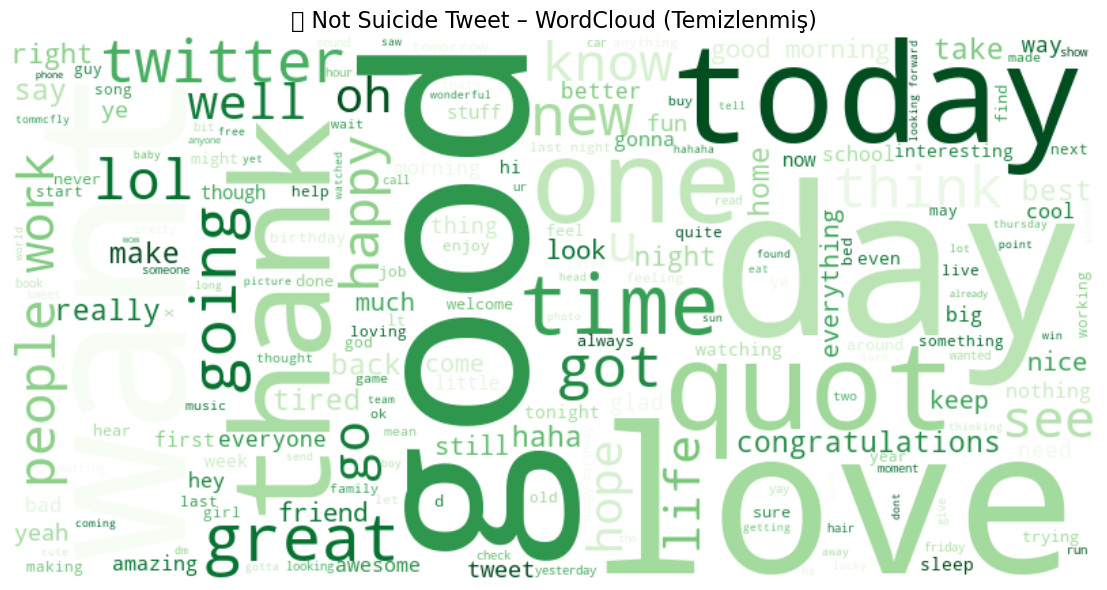

In [138]:
# Güncel manual stopwords
manual_stopwords = {
    "rt", "amp", "https", "im", "i'm", "â€™", "â€", "-", "&amp;", "…", "‘", "’", "t", "co"
}

# ASCII olmayan karakterleri temizle
not_suicide_clean = df[df["Suicide"] == "Not Suicide post"]["Tweet"].astype(str).str.encode('ascii', 'ignore').str.decode('ascii')

# Metinleri birleştir
not_suicide_text = " ".join(not_suicide_clean).lower()
not_words = not_suicide_text.split()

# Stopwords + manuel temizleme + linkleri çıkar
filtered_not_words = [
    word for word in not_words
    if word not in stop_words
    and word not in manual_stopwords
    and not word.startswith("http")
]

# WordCloud oluştur
not_wordcloud_text = " ".join(filtered_not_words)
not_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(not_wordcloud_text)

# Görselleştir
plt.figure(figsize=(12,6))
plt.imshow(not_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🟢 Not Suicide Tweet – WordCloud (Temizlenmiş)", fontsize=16)
plt.tight_layout()
plt.show()

## 📦 Tweet Uzunluğu Karşılaştırması – Boxplot  

Bu adımda, "Potential Suicide post" ve "Not Suicide post" olarak etiketlenmiş tweet’lerin karakter uzunlukları, Boxplot (kutu grafiği) kullanılarak karşılaştırılmıştır.

Boxplot, her sınıfın minimum, maksimum, medyan (ortanca), çeyrekler arası açıklık (IQR) ve olası aykırı değerlerini görsel olarak sunar.  
Bu grafik sayesinde, tweet’lerin uzunluk dağılımları hem merkezi eğilim hem de yayılım açısından kolayca gözlemlenebilir.

Analiz sonucunda, **depresyon belirtisi taşıyan tweet’lerin** genellikle **daha uzun** olduğu görülmüştür. Bu durum, bireylerin kendilerini ifade etme çabasıyla daha detaylı, yoğun ve açıklayıcı metinler yazdığını göstermektedir.  
Öte yandan, **depresyon içermeyen tweet’ler** ise daha kısa, daha basit ve genellikle pozitif ifade kalıplarına sahip olma eğilimindedir.

Bu karşılaştırma, dilsel yoğunluk ve duygusal yük farklarının sadece içerikte değil, metin uzunluğunda da açıkça ortaya çıktığını göstermektedir.


In [139]:
df["length"] = df["Tweet"].astype(str).apply(len)


/var/folders/gs/ykl8gdkx00908nfcxlmr_4c80000gn/T/ipykernel_84253/1595804499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Suicide", y="length", palette="Set2")


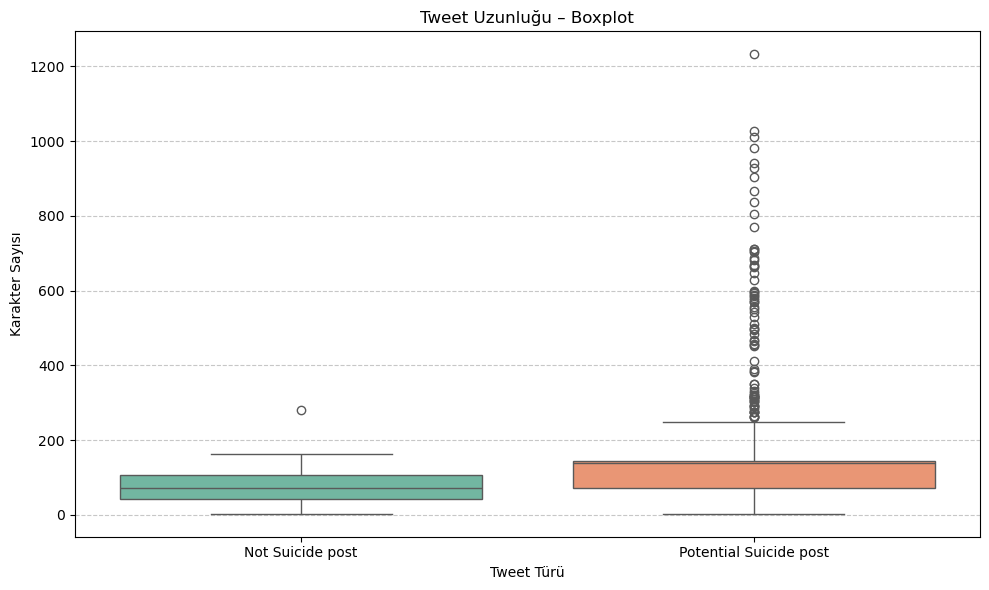

In [140]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Suicide", y="length", palette="Set2")
plt.title("Tweet Uzunluğu – Boxplot")
plt.xlabel("Tweet Türü")
plt.ylabel("Karakter Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 🎻 Tweet Uzunluğu Dağılımı – Violin Plot  

Bu bölümde, tweet’lerin karakter uzunlukları `violin plot` (keman grafiği) kullanılarak görselleştirilmiştir.  
Violin plot, klasik boxplot’un sunduğu özet istatistiklerin (medyan, çeyrekler, aykırı değerler) yanı sıra, veri yoğunluğunu gösteren bir dağılım eğrisi de sunar. Bu sayede hem merkezi eğilim hem de dağılım şekli aynı grafikte gözlemlenebilir.

Grafikte iki sınıf karşılaştırılmıştır:
- **Potential Suicide post** (depresyon belirtisi taşıyan tweet'ler)
- **Not Suicide post** (normal tweet'ler)

Sonuçlara göre, depresyon içerikli tweet’lerin **daha geniş bir uzunluk dağılımına** sahip olduğu ve daha fazla **çeşitlilik ve yoğunluk** barındırdığı görülmektedir. Bu durum, bu sınıfa ait bireylerin duygu ve düşüncelerini daha ayrıntılı ve karmaşık şekilde ifade etme eğiliminde olduklarını göstermektedir.

Buna karşılık, Not Suicide sınıfındaki tweet’ler daha dar bir uzunluk aralığında toplanmış ve daha yoğun bir şekilde belirli uzunluklara sıkışmıştır. Bu da bu sınıftaki kullanıcıların daha kısa ve sade anlatımları tercih ettiğini göstermektedir.

Violin plot sayesinde sınıflar arası dilsel yoğunluk farkı sadece sayısal değil, **görsel olarak da güçlü bir şekilde sunulmuş olur**.


/var/folders/gs/ykl8gdkx00908nfcxlmr_4c80000gn/T/ipykernel_84253/2301389076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Suicide", y="length", palette="Pastel1", inner="box")


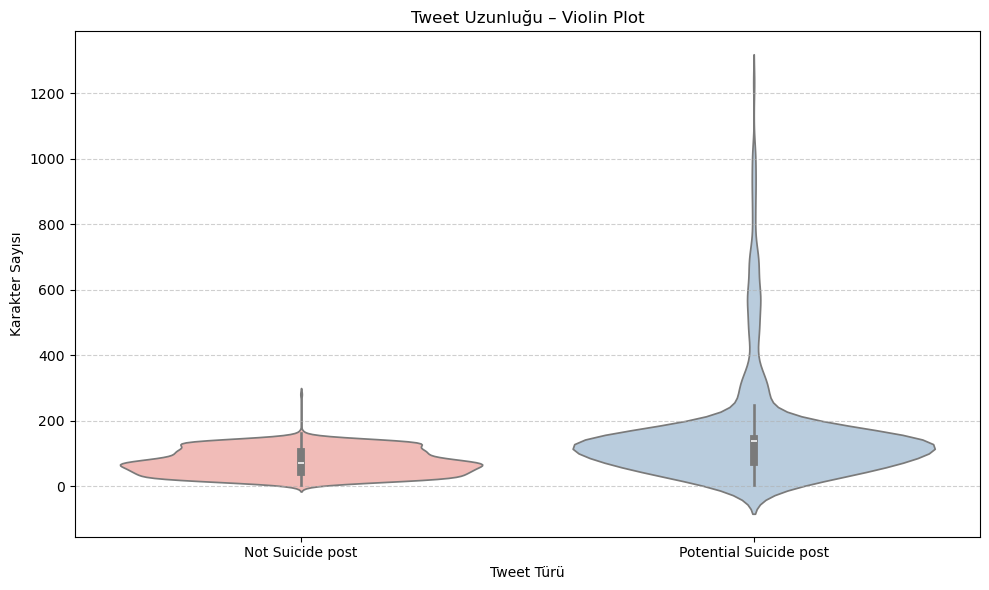

In [141]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Suicide", y="length", palette="Pastel1", inner="box")
plt.title("Tweet Uzunluğu – Violin Plot")
plt.xlabel("Tweet Türü")
plt.ylabel("Karakter Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 🔴Depresyon Tweet’leri – WordCloud & Barplot Yan Yana  

Bu adımda, “Potential Suicide post” sınıfına ait temizlenmiş tweet metinlerinden elde edilen en sık kullanılan kelimeler hem **WordCloud** hem de **barplot** formatında görselleştirilmiştir.  
Amaç, hem **sözcük frekanslarını sayısal olarak göstermek** (barplot) hem de **dilsel tonun duygusal yoğunluğunu görselleştirmek** (WordCloud) olmuştur.

### 📊 Barplot Yorumu:
Barplot ile en çok geçen kelimeler sayısal olarak sıralanmıştır.  
Özellikle `die`, `kill`, `tired`, `hate`, `help`, `cry` gibi kelimeler öne çıkmıştır.  
Bu kelimeler, bireylerin yaşadığı duygusal çöküntüyü, yalnızlık hissini ve çaresizliğini açıkça yansıtmaktadır.  
Bu kelimelerin yüksek frekansla geçmesi, tweet’lerin ruhsal durum değerlendirmesinde ciddi bir işaret niteliğindedir.

### ☁️ WordCloud Yorumu:
WordCloud ise bu kelimeleri **frekansa göre orantılı büyüklükte** göstererek görsel bir özet sunar.  
Büyük yazılan kelimeler en sık geçenlerdir. Bu sayede veriye genel bakışta bile duygusal ton anlaşılabilir.

Bu iki görsel birlikte kullanılarak:
- Hem **istatistiksel hem de duygusal analiz** sağlanmış,
- Metin madenciliği süreci çok daha okunabilir ve anlaşılır hale getirilmiştir.

Bu yöntem, içerik analizi ve dil örüntülerini anlamada çok etkilidir ve makine öğrenmesine geçmeden önce **veriyi tanıma** açısından kritik bir adımdır.


In [142]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(" ".join(suicide_words))


/var/folders/gs/ykl8gdkx00908nfcxlmr_4c80000gn/T/ipykernel_84253/1050347167.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=suicide_df, x="Frekans", y="Kelime", ax=axes[1], palette="Reds_r")


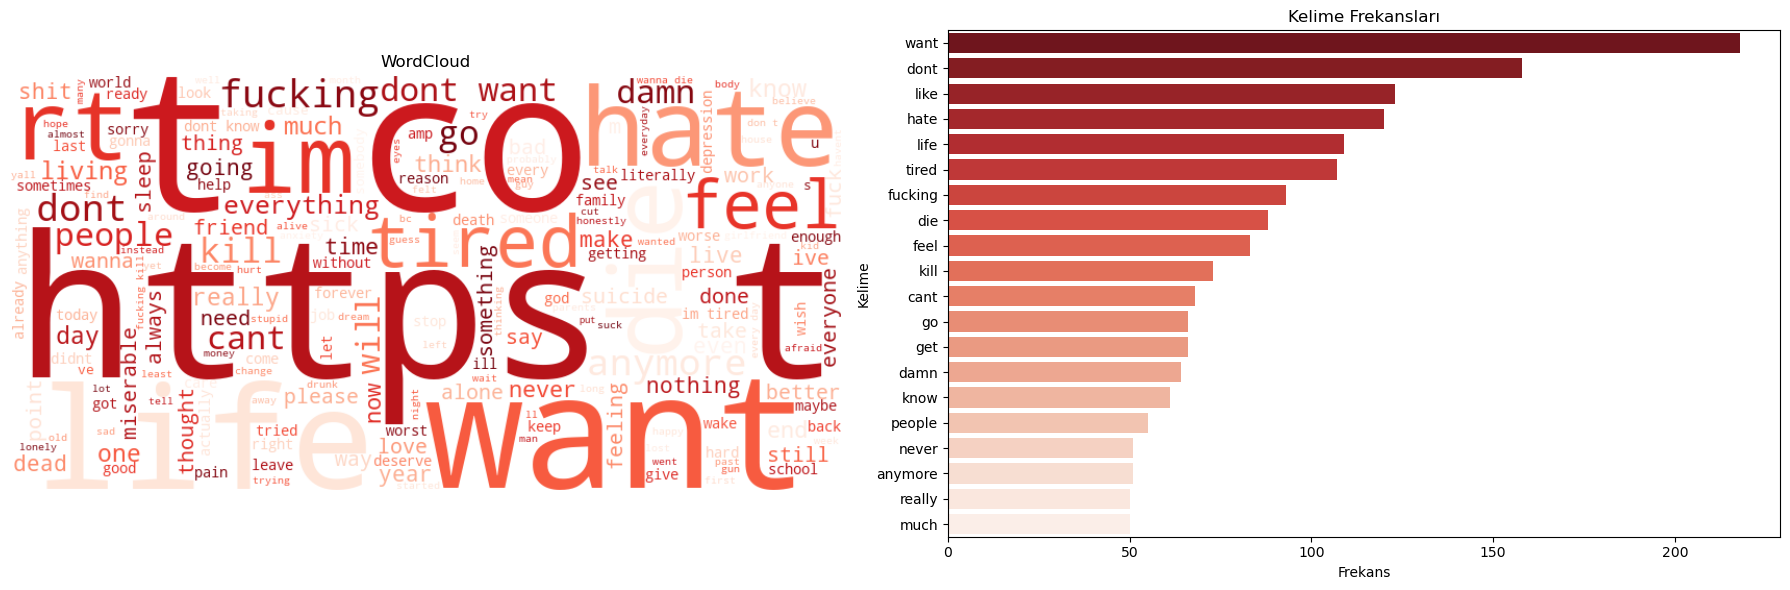

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

# WordCloud
axes[0].imshow(wordcloud, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title("WordCloud")

# Barplot
sns.barplot(data=suicide_df, x="Frekans", y="Kelime", ax=axes[1], palette="Reds_r")
axes[1].set_title("Kelime Frekansları")

plt.tight_layout()
plt.show()

## 🟢Olumlu Tweet’ler – WordCloud & Barplot  

Bu bölümde, depresyon belirtisi taşımayan yani \"Not Suicide post\" sınıfına ait tweet’lerde en sık geçen kelimeler hem **WordCloud (kelime bulutu)** hem de **barplot (çubuk grafik)** şeklinde görselleştirilmiştir.  
Bu iki farklı görsel yaklaşım, hem kelimelerin frekans dağılımını hem de genel içerik tonunu daha etkili ve anlaşılır biçimde sunmaktadır.

### 📊 Barplot Yorumu:
Barplot grafiğinde, olumlu içerikli tweet’lerde en sık kullanılan kelimeler frekanslarına göre sıralanmıştır.  
Kelime analizinde `love`, `friend`, `happy`, `day`, `life`, `fun`, `good` gibi kelimeler dikkat çekici şekilde ön plana çıkmaktadır.  
Bu kelimeler, bireylerin sosyal bağlarını, olumlu duygularını ve günlük yaşamın keyifli yönlerini ifade etme eğiliminde olduklarını göstermektedir.  
Aynı zamanda bu sınıf, sosyal medya paylaşımlarının daha çok pozitif ifade içerdiği normal kullanıcı davranışlarını yansıtır.

### ☁️ WordCloud Yorumu:
WordCloud ise bu kelimeleri görsel olarak büyükten küçüğe sıralı biçimde sunar.  
En sık geçen kelimeler daha büyük, nadiren geçenler daha küçük boyutta gösterilir.  
WordCloud, hızlı bir bakışla içerik tonunun olumlu olduğunu sezdiren bir araç olarak işlev görür.

### 🧠 Genel Değerlendirme:
Olumlu sınıfa ait bu iki görsel, dilin yapısal olarak nasıl değiştiğini anlamamıza yardımcı olur.  
Pozitif duygular taşıyan tweet’lerde daha sade, kısa ve gündelik kelimeler hâkimken; depresyon içerikli sınıfta daha karamsar ve yoğun dil örüntüleri gözlenmektedir.  
Bu fark, yalnızca metinlerin anlamında değil, kelime seçimi ve dil duygusunda da net şekilde ortaya çıkar.

Bu tür görselleştirmeler, sosyal medya üzerinden ruh sağlığına dair ipuçları elde etmenin etkili yollarından biridir.


/var/folders/gs/ykl8gdkx00908nfcxlmr_4c80000gn/T/ipykernel_84253/1590190318.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=not_suicide_df, x="Frekans", y="Kelime", ax=axes[1], palette="Greens_r")
/var/folders/gs/ykl8gdkx00908nfcxlmr_4c80000gn/T/ipykernel_84253/1590190318.py:13: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


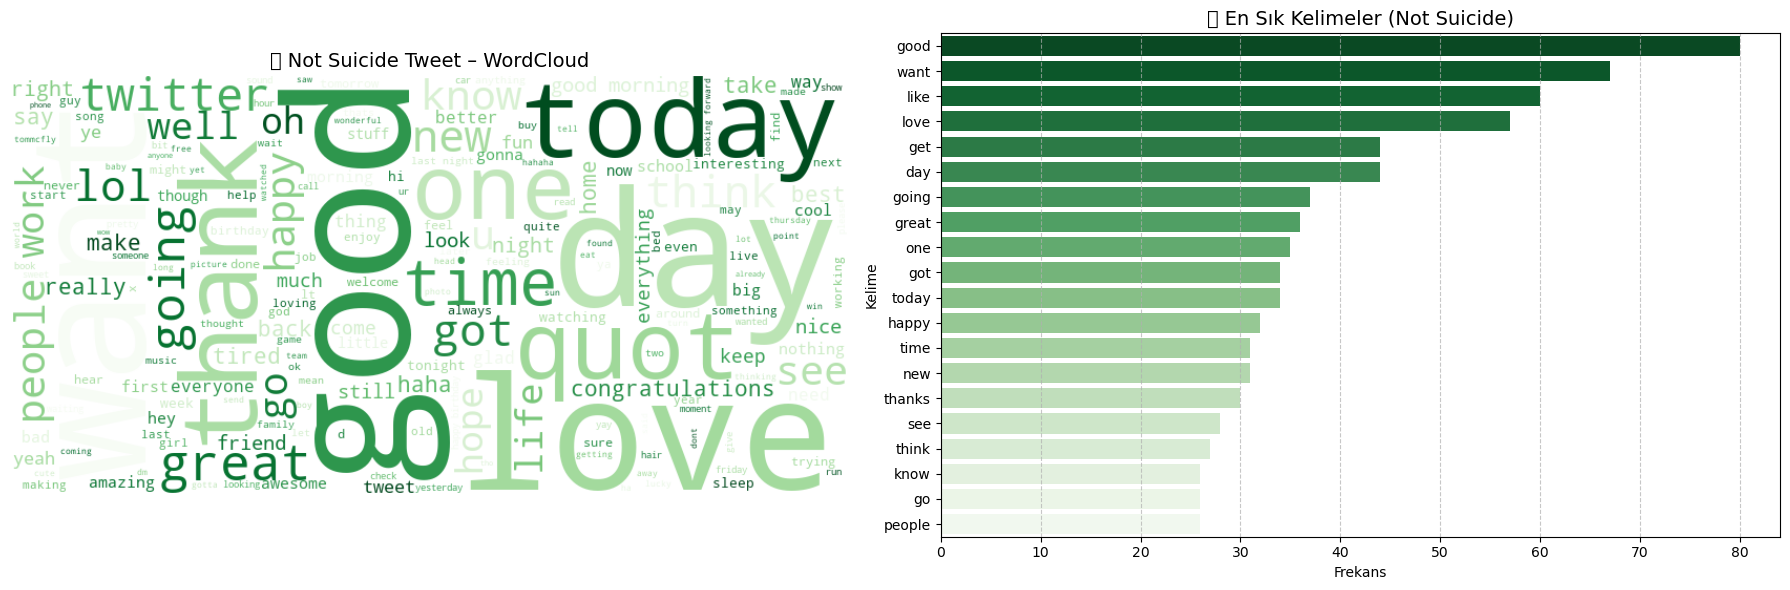

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# WordCloud
axes[0].imshow(not_wordcloud, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title("🟢 Not Suicide Tweet – WordCloud", fontsize=14)

# Barplot
sns.barplot(data=not_suicide_df, x="Frekans", y="Kelime", ax=axes[1], palette="Greens_r")
axes[1].set_title("🟢 En Sık Kelimeler (Not Suicide)", fontsize=14)
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [145]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## 🤖 Naive Bayes ile Tweet Sınıflandırması (Depresyon Tahmini)

Bu adımda, tweet içeriklerinin depresyon belirtisi taşıyıp taşımadığını otomatik olarak tahmin edebilecek bir **sınıflandırma modeli** oluşturulmuştur.

Model olarak **Naive Bayes** algoritması tercih edilmiştir.  
Bu algoritma, olasılık kurallarına dayanan ve özellikle metin sınıflandırmalarında yaygın olarak kullanılan etkili bir yöntemdir.

Tweet’ler, önce temizlenmiş kelime matrisine (Bag of Words) dönüştürülmüş, ardından eğitim ve test veri setlerine ayrılarak model eğitilmiştir.


In [146]:
df["label"] = df["Suicide"].apply(lambda x: 1 if x == "Potential Suicide post" else 0)



In [147]:
import re
import string
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def temizle(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    kelimeler = text.split()
    temiz_kelimeler = [kelime for kelime in kelimeler if kelime not in stop_words]
    return " ".join(temiz_kelimeler)

df["temiz_metin"] = df["Tweet"].apply(temizle)


## 🧮 Metinlerin Sayısallaştırılması – CountVectorizer

Metin verisi doğrudan sayısal modele uygun değildir.  
Bu yüzden tweet’ler, **CountVectorizer** kullanılarak **kelime frekans matrisine** dönüştürülmüştür.  
Bu matris, her tweet’in içinde geçen kelimelerin sayısını temsil eder ve modelin öğrenmesini sağlar.


In [148]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["temiz_metin"])
y = df["label"]


In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [150]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

## 🧠 Model Eğitimi ve Başarı Ölçümü

Veri, %80 eğitim ve %20 test olacak şekilde ayrılmıştır.  
Eğitim verisiyle **Multinomial Naive Bayes** modeli eğitilmiş, test verisiyle tahmin yapılmıştır.

Modelin başarı durumu aşağıdaki metriklerle değerlendirilmiştir:

- 📊 **Doğruluk (Accuracy)**: Modelin genel başarı oranı  
- 🎯 **Hassasiyet (Precision)**: Modelin depresyon tahmini yaptığı tweet’lerdeki isabet oranı  
- 🧪 **Duyarlılık (Recall)**: Gerçekten depresyon içeren tweet’leri doğru tahmin etme oranı  
- 📏 **F1-Score**: Precision ve recall dengesini ölçen başarı metriği

Bu metrikler, `classification_report()` fonksiyonu ile elde edilmiştir.  
Sınıflar, “Normal Tweet” ve “Depresyon Tweet” olarak gösterilmiştir.


In [151]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Test verisinde tahmin yap
y_pred = model.predict(X_test)


dogruluk = accuracy_score(y_test, y_pred)
print("✅ Doğruluk Oranı (Accuracy):", round(dogruluk * 100, 2), "%\n")

print("📊 Karışıklık Matrisi (Confusion Matrix):")
cm = confusion_matrix(y_test, y_pred)
print(cm, "\n")

rapor = classification_report(y_test, y_pred, target_names=["Normal Tweet", "Depresyon Tweet"])
print("📋 Sınıflandırma Raporu (Classification Report):\n")
print(rapor)


✅ Doğruluk Oranı (Accuracy): 85.47 %

📊 Karışıklık Matrisi (Confusion Matrix):
[[178  39]
 [ 13 128]] 

📋 Sınıflandırma Raporu (Classification Report):

                 precision    recall  f1-score   support

   Normal Tweet       0.93      0.82      0.87       217
Depresyon Tweet       0.77      0.91      0.83       141

       accuracy                           0.85       358
      macro avg       0.85      0.86      0.85       358
   weighted avg       0.87      0.85      0.86       358



## 🔍 Tek Tweet Üzerinden Olasılık Hesabı

Ayrıca tekil bir tweet girilerek, modelin bu tweet’in **depresyon içerme olasılığını** hesaplaması sağlanmıştır.  
Bu işlem, modelin olasılık tabanlı tahmin yeteneğini göstermektedir.

Örnek:
> "i feel very tired and hopeless today" → %83.02 olasılıkla depresyon belirtisi içeriyor.

Bu sonuç, **Bayes Teoremi** kullanılarak elde edilen olasılıklarla hesaplanmaktadır.


In [152]:
tweet = ["i feel so tired and hopeless today"]
tweet_vector = vectorizer.transform(tweet)
proba = model.predict_proba(tweet_vector)

print(f"Bu tweetin depresyon içerme olasılığı: %{proba[0][1] * 100:.2f}")


Bu tweetin depresyon içerme olasılığı: %83.02


## 📊 Naive Bayes – Karışıklık Matrisi (Confusion Matrix)

Modelin yaptığı sınıflandırmaların doğru ve yanlış tahminlerini görselleştirmek için **karışıklık matrisi (confusion matrix)** kullanılmıştır.
Bu grafikte modelin ne kadar doğru tahmin yaptığını sayısal olarak görebiliyoruz.
Sol üstte ve sağ altta doğru tahminler, diğer köşelerde yanlış sınıflandırmalar yer alıyor.
Model, depresyon içerikli tweet’leri büyük oranda doğru tahmin etmiş.

- Sol üst köşe: Gerçekten normal tweet’leri doğru tahmin edenler  
- Sağ alt köşe: Gerçekten depresyon içerikli tweet’leri doğru tahmin edenler  
- Diğer iki köşe: Modelin yaptığı hatalı tahminlerdir
  

Bu grafik, modelin **hatalarını ve başarılarını sayısal olarak görmek için** oldukça kullanışlıdır.


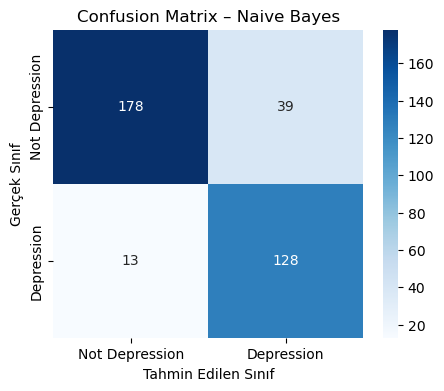

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Depression", "Depression"], yticklabels=["Not Depression", "Depression"])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Confusion Matrix – Naive Bayes")
plt.show()


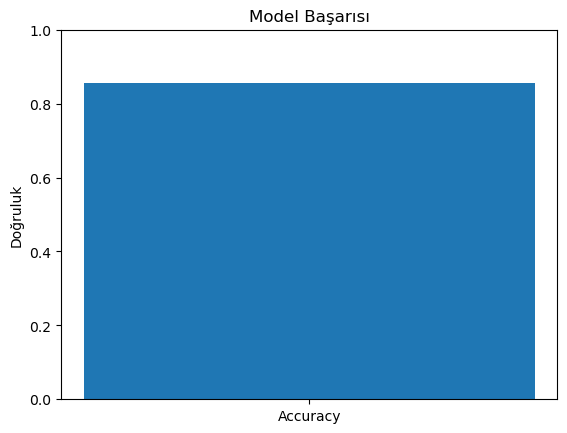

In [117]:
accuracy = accuracy_score(y_test, y_pred)

plt.bar(["Accuracy"], [accuracy])
plt.ylim(0, 1)
plt.title("Model Başarısı")
plt.ylabel("Doğruluk")
plt.show()


In [118]:
df["uzunluk"] = df["Tweet"].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)


## 📏 Tweet Uzunluğu Üzerinden Varyans Eşitliği – Levene's Test

Bu adımda, depresyon içerikli tweet'lerle normal tweet'lerin karakter uzunlukları arasındaki **varyans farkı** istatistiksel olarak test edilmiştir.  
Varyans farkını test etmek için **Levene's Test** uygulanmıştır. Bu test, iki grubun veri dağılımlarının ne kadar değişkenlik gösterdiğini ölçer.

### H0 (Null hipotez):  
İki grubun varyansları birbirine eşittir.

### H1 (Alternatif hipotez):  
İki grubun varyansları farklıdır.

Test sonucunda p-değeri `2.68 × 10⁻³⁰` çıkmıştır.  
Bu değer %5 anlamlılık düzeyinden çok küçük olduğu için **H0 reddedilir**.  
Yani **depresyon içerikli tweet’lerin uzunlukları, anlamlı şekilde daha değişkendir**.

Bu durum, bireylerin duygusal durumlarını ifade ederken **daha dağınık, uzun veya kısa yazma davranışları** sergilediklerini göstermektedir.


In [119]:
depresyon = df[df["label"] == 1]["uzunluk"]
normal = df[df["label"] == 0]["uzunluk"]


In [120]:
from scipy.stats import levene

istatistik, p_degeri = levene(depresyon, normal)
print("Levene Test Sonucu:")
print("İstatistik:", istatistik)
print("p-değeri:", p_degeri)


Levene Test Sonucu:
İstatistik: 135.78946557853385
p-değeri: 2.689367899179821e-30


Levene varyans eşitliği testini kullanarak, depresyon içerikli tweet’lerle normal tweet’lerin uzunluk dağılımlarının değişkenliğini karşılaştırdık.
Sonuçlara göre p-değeri 2.68 × 10⁻³⁰ olarak bulunmuştur.
Bu değer, %5 anlamlılık düzeyinden çok daha küçük olduğu için, iki grubun varyansları arasında istatistiksel olarak anlamlı fark vardır diyebiliriz.
Yani depresyon içerikli tweet’lerin uzunlukları, normal tweet’lere kıyasla daha değişken, daha geniş aralıklarda yazılmıştır.
Bu da yazım davranışlarında farklılık olduğunu gösterir.

## 🎻 Tweet Uzunluğu Dağılımı – Violin Plot

Levene testi ile elde edilen varyans farkı, **violin plot** görseliyle desteklenmiştir.  
Violin plot, hem klasik kutu grafiği özelliklerini taşır hem de veri yoğunluğunu simetrik olarak görselleştirir.

Grafikte açıkça görüldüğü gibi, **depresyon içerikli tweet’lerin uzunlukları**, normal tweet’lere kıyasla **daha geniş bir dağılım** göstermektedir.  
Bu da yazım davranışlarında daha fazla çeşitlilik ve duygusal dalgalanma olduğunu gösterir.

Bu görselleştirme, istatistiksel sonucu daha kolay yorumlamamızı sağlar.


/var/folders/gs/ykl8gdkx00908nfcxlmr_4c80000gn/T/ipykernel_84253/2924100179.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="label", y="uzunluk", data=df, palette=["#7FB3D5", "#EC7063"])


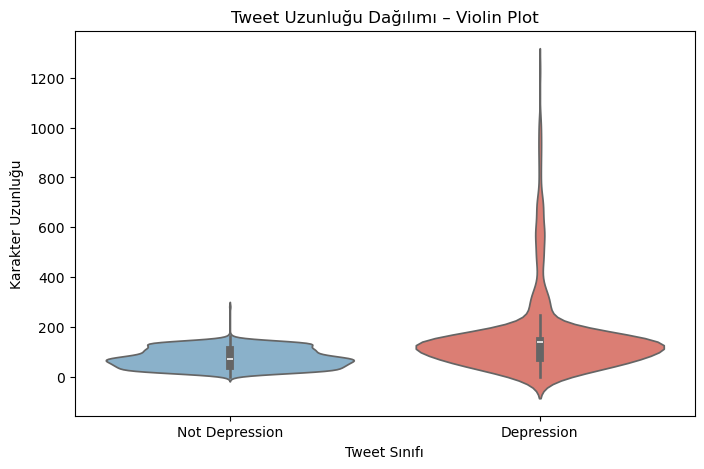

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.violinplot(x="label", y="uzunluk", data=df, palette=["#7FB3D5", "#EC7063"])
plt.xticks([0, 1], ["Not Depression", "Depression"])
plt.title("Tweet Uzunluğu Dağılımı – Violin Plot")
plt.xlabel("Tweet Sınıfı")
plt.ylabel("Karakter Uzunluğu")
plt.show()


/var/folders/gs/ykl8gdkx00908nfcxlmr_4c80000gn/T/ipykernel_84253/1169558522.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="uzunluk", data=df, palette=["#7FB3D5", "#EC7063"])


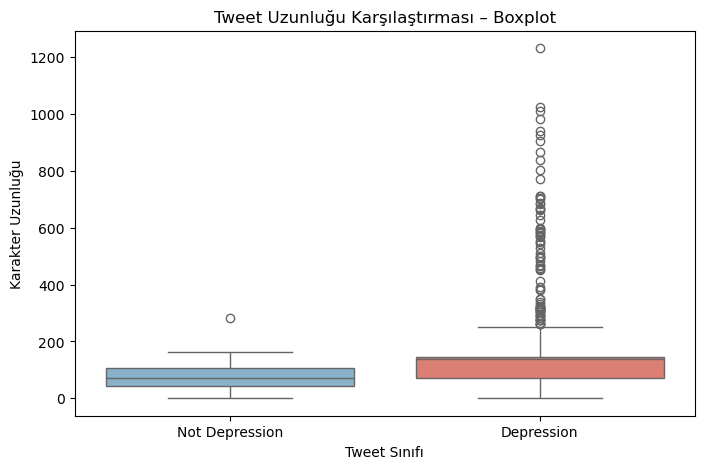

In [77]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="label", y="uzunluk", data=df, palette=["#7FB3D5", "#EC7063"])
plt.xticks([0, 1], ["Not Depression", "Depression"])
plt.title("Tweet Uzunluğu Karşılaştırması – Boxplot")
plt.xlabel("Tweet Sınıfı")
plt.ylabel("Karakter Uzunluğu")
plt.show()
